In [1]:
import pandas as pd
df = pd.read_csv('../../Data/Crop_Recommendation_with_clusters.csv', index_col=0)
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop_Cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice_Papaya_Jute
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice_Papaya_Jute
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice_Papaya_Jute
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice_Papaya_Jute
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice_Papaya_Jute


In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV

In [3]:
X = df.drop('Crop_Cluster', axis=1)
y = df['Crop_Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [4]:
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    index=X_train.index,
    columns=X_train.columns
)
X_train_scaled

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
1656,0.121429,0.078571,0.045,0.217234,0.908990,0.485322,0.296852
752,0.264286,0.528571,0.070,0.537110,0.642579,0.565941,0.176308
892,0.050000,0.485714,0.100,0.536479,0.570058,0.588352,0.089318
1041,0.721429,0.464286,0.215,0.474462,0.708898,0.390017,0.345770
1179,0.000000,0.085714,0.125,0.764684,0.393181,0.431452,0.278327
...,...,...,...,...,...,...,...
1638,0.071429,0.000000,0.000,0.355451,0.899329,0.670741,0.332938
1095,0.771429,0.635714,0.210,0.531809,0.819906,0.448294,0.253244
1130,0.078571,0.221429,0.130,0.547921,0.437603,0.461981,0.287198
1294,0.078571,0.850000,0.995,0.132116,0.767637,0.444205,0.183467


In [5]:
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    index=X_test.index,
    columns=X_test.columns
)


In [6]:
logreg = LogisticRegressionCV(fit_intercept=False, solver='liblinear', random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegressionCV(fit_intercept=False, random_state=42, solver='liblinear')

In [7]:
y_hat_train = logreg.predict(X_train_scaled)

In [8]:
logreg.score(X_train_scaled, y_train)

0.9534090909090909

In [9]:
logreg.score(X_test_scaled, y_test)

0.9159090909090909

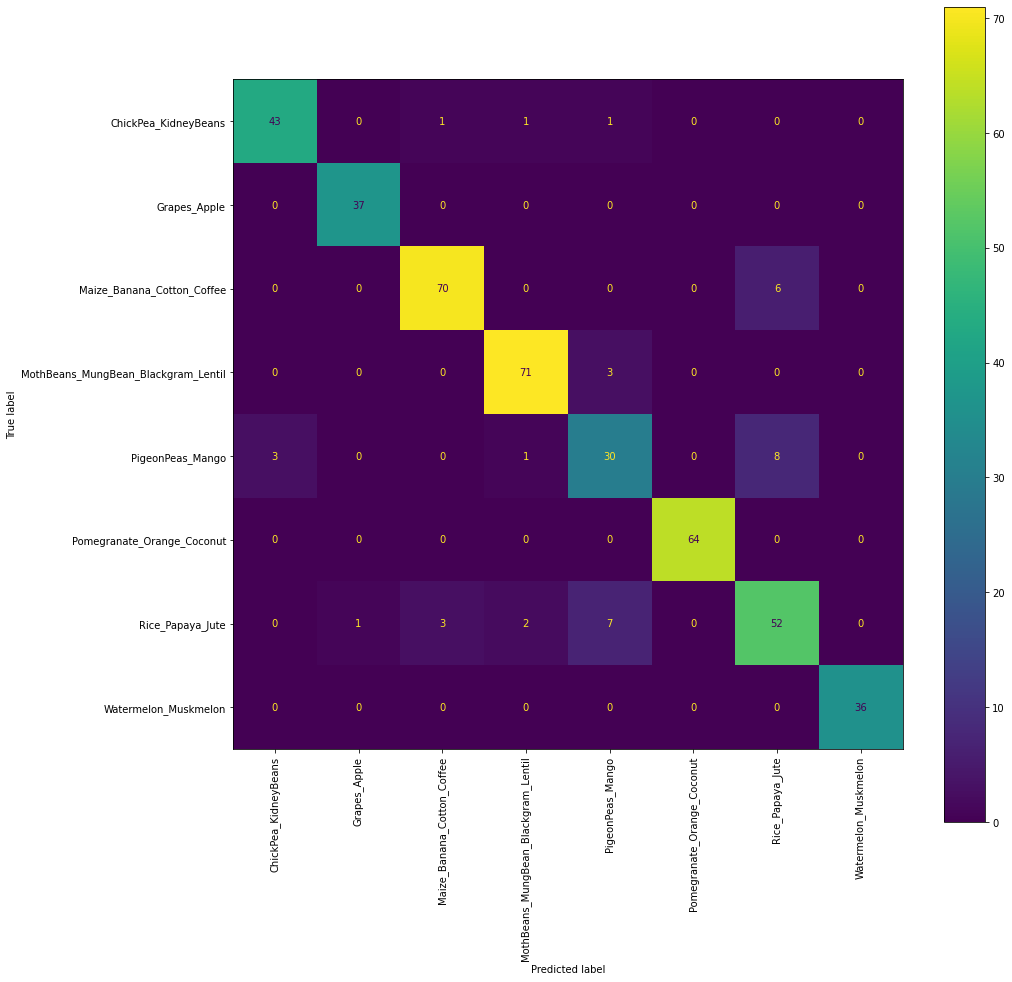

In [10]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from matplotlib import pyplot as plt
cm_train = confusion_matrix(y_hat_train, y_train)
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(estimator=logreg,
                     X=X_test_scaled,
                     y_true=y_test,
                     ax = ax,
                     xticks_rotation='vertical')

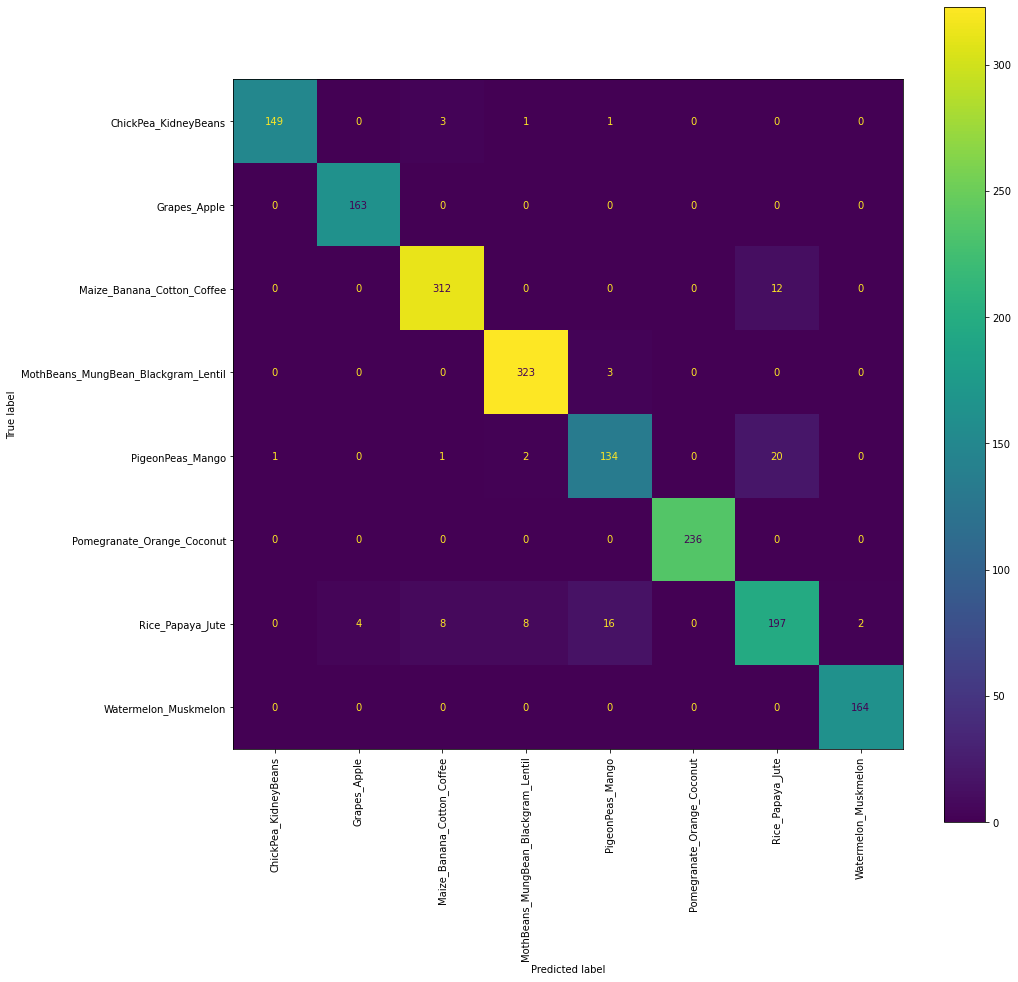

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(estimator=logreg,
                     X=X_train_scaled,
                     y_true=y_train,
                     ax = ax,
                     xticks_rotation='vertical')

In [12]:
from sklearn.linear_model import LogisticRegression
logreg2 = LogisticRegression(fit_intercept=False, solver='liblinear', C=1e12, random_state=42)
logreg2.fit(X_train_scaled, y_train)
logreg2.score(X_train_scaled, y_train)

0.9636363636363636

In [13]:
logreg2.score(X_test_scaled, y_test)

0.9318181818181818

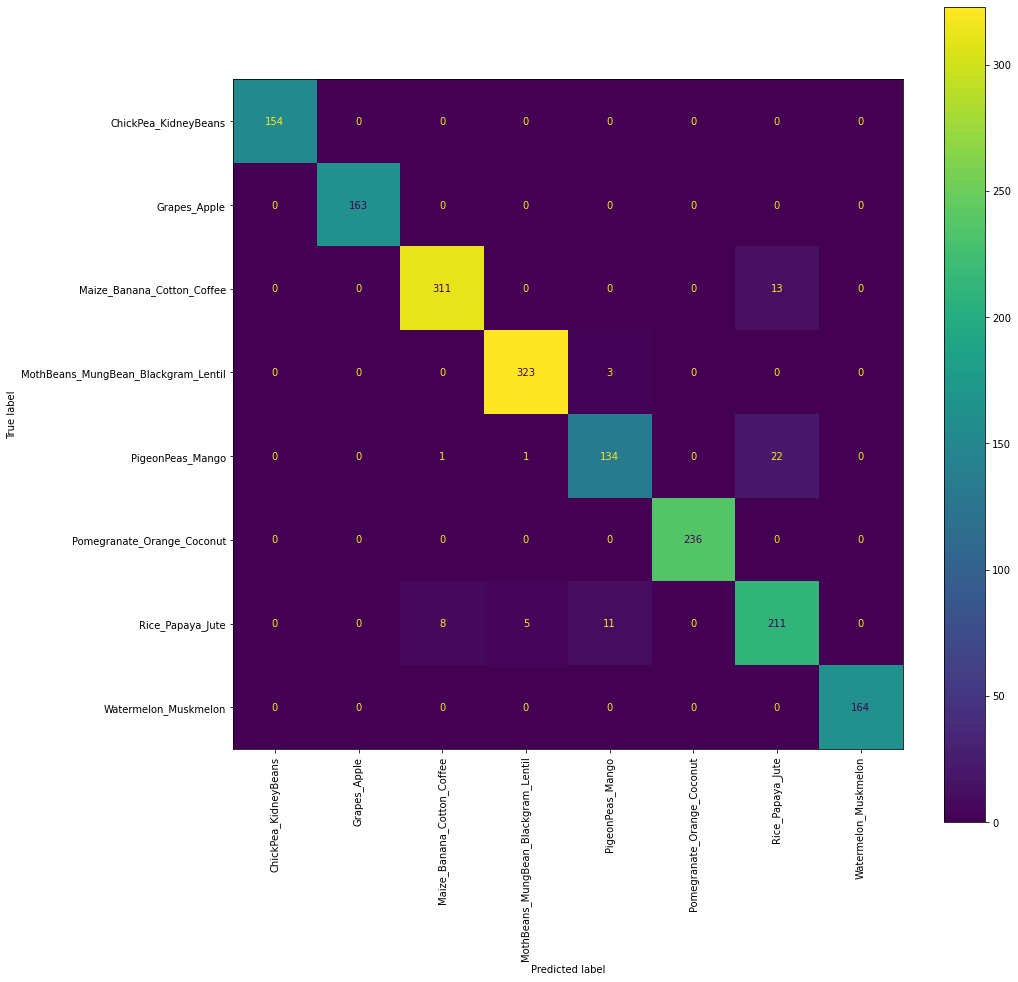

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(estimator=logreg2,
                     X=X_train_scaled,
                     y_true=y_train,
                     ax = ax,
                     xticks_rotation='vertical')

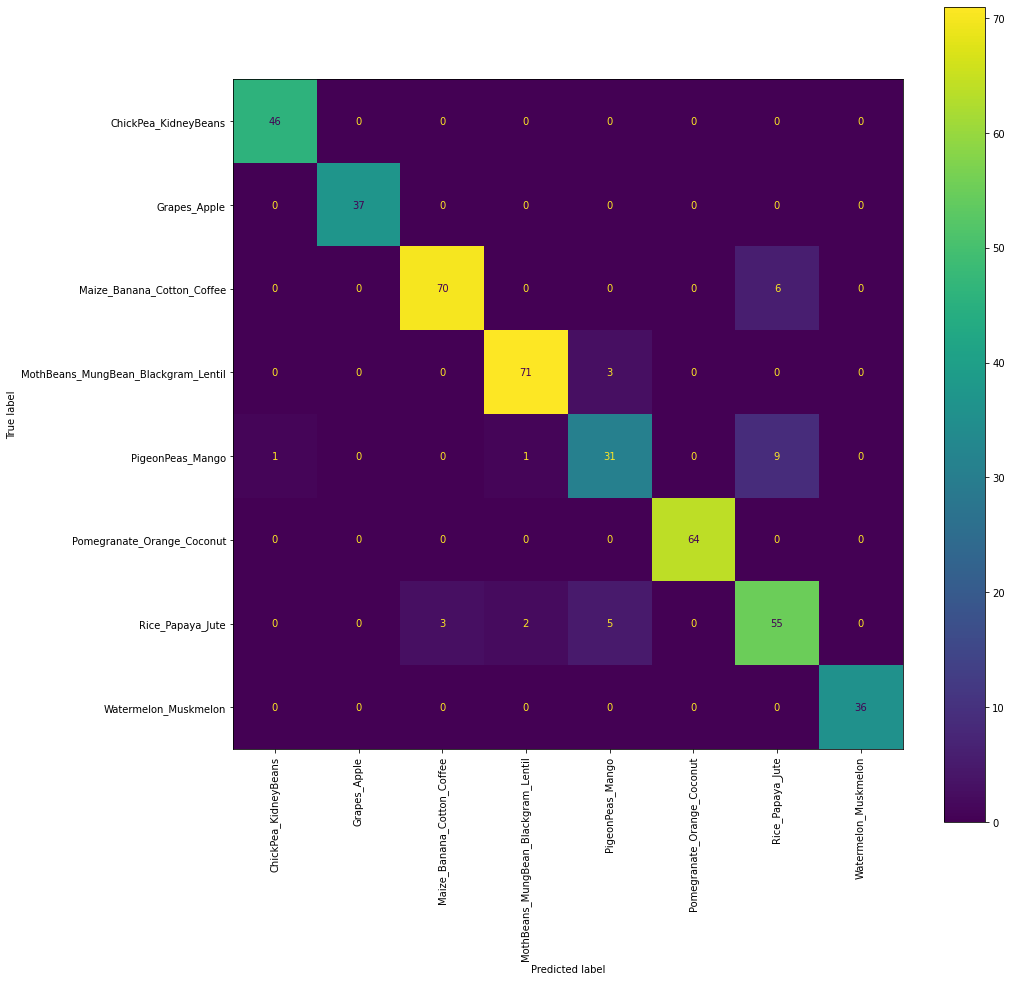

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(estimator=logreg2,
                     X=X_test_scaled,
                     y_true=y_test,
                     ax = ax,
                     xticks_rotation='vertical')

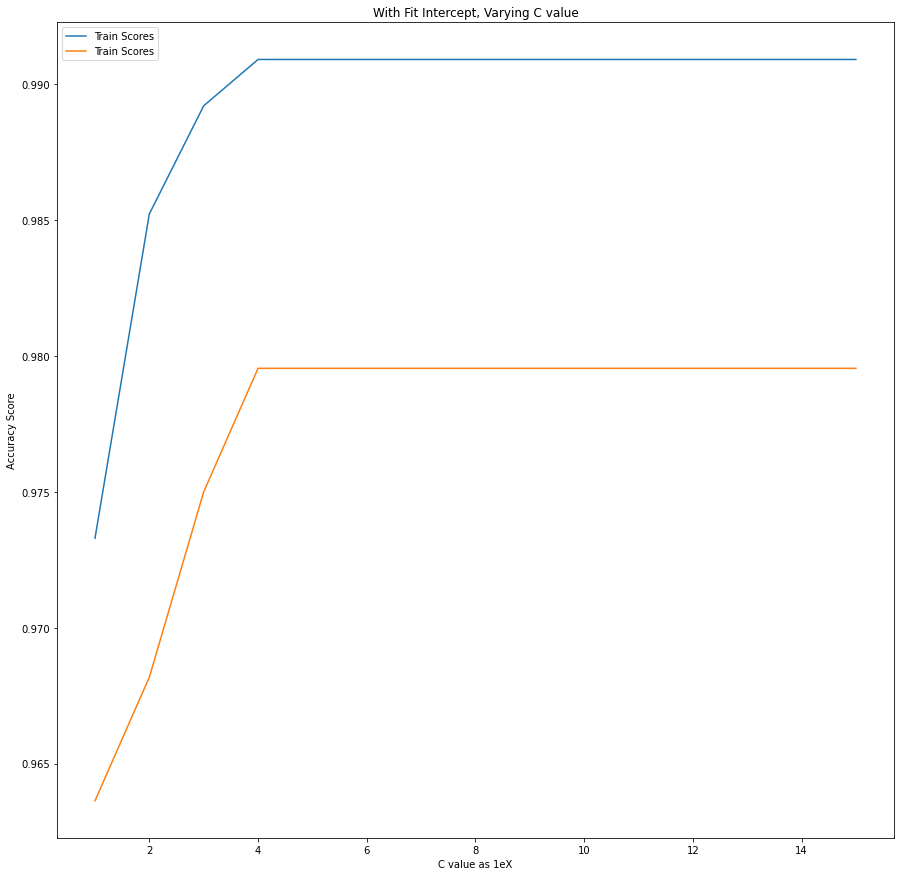

In [17]:
train_scores = []
test_scores = []
Cs = [1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12,1e13,1e14,1e15]
for c in Cs:
    curr_logreg = LogisticRegression(fit_intercept=True, solver='liblinear', C=c, random_state=42)
    curr_logreg.fit(X_train_scaled, y_train)
    train_scores.append(curr_logreg.score(X_train_scaled, y_train))
    test_scores.append(curr_logreg.score(X_test_scaled,y_test))
fig, ax = plt.subplots(figsize=(15,15))
plt.plot(range(1,16), train_scores, label='Train Scores')
plt.plot(range(1,16), test_scores, label='Train Scores')
plt.xlabel("C value as 1eX")
plt.ylabel("Accuracy Score")
plt.title("With Fit Intercept, Varying C value")
plt.legend()

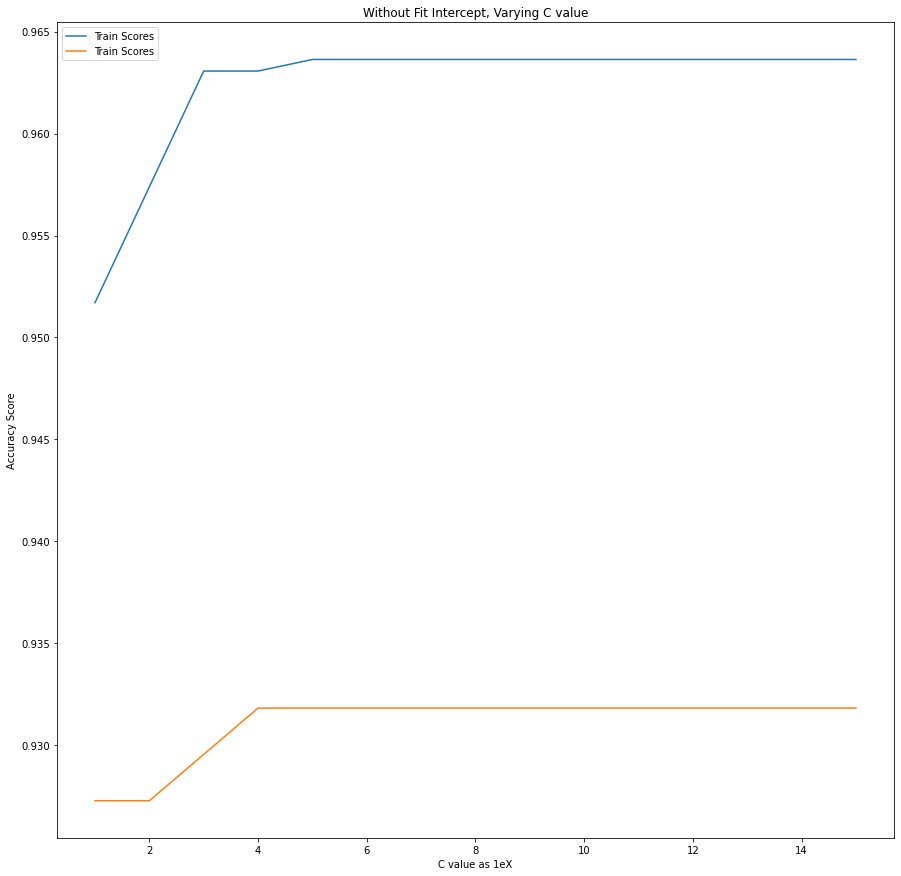

In [17]:
train_scores = []
test_scores = []
Cs = [1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12,1e13,1e14,1e15]
for c in Cs:
    curr_logreg = LogisticRegression(fit_intercept=False, solver='liblinear', C=c, random_state=42)
    curr_logreg.fit(X_train_scaled, y_train)
    train_scores.append(curr_logreg.score(X_train_scaled, y_train))
    test_scores.append(curr_logreg.score(X_test_scaled,y_test))
fig, ax = plt.subplots(figsize=(15,15))
plt.plot(range(1,16), train_scores, label='Train Scores')
plt.plot(range(1,16), test_scores, label='Train Scores')
plt.xlabel("C value as 1eX")
plt.ylabel("Accuracy Score")
plt.title("Without Fit Intercept, Varying C value")
plt.legend()

# Best yet LogReg
C = 1e4; fit_intercept=True

In [24]:
logreg_best_yet = LogisticRegression(fit_intercept=True, solver='liblinear', C=1e4, random_state=42)
logreg_best_yet.fit(X_train_scaled, y_train)

LogisticRegression(C=10000.0, random_state=42, solver='liblinear')

In [25]:
logreg_best_yet_train_acc = logreg_best_yet.score(X_train_scaled, y_train)
logreg_best_yet_test_acc = logreg_best_yet.score(X_test_scaled, y_test)
print("Train Score: ", logreg_best_yet_train_acc)
print("Test Score: ", logreg_best_yet_test_acc)

Train Score:  0.990909090909091
Test Score:  0.9795454545454545


In [30]:
from sklearn.metrics import classification_report
y_pred_train = logreg_best_yet.predict(X_train_scaled)
y_pred_test = logreg_best_yet.predict(X_test_scaled)
print("Training Classification Report")
print(classification_report(y_train, y_pred_train))
print("Testing Classification Report")
print(classification_report(y_test, y_pred_test))

Training Classification Report
                                     precision    recall  f1-score   support

               ChickPea_KidneyBeans       1.00      1.00      1.00       154
                       Grapes_Apple       1.00      1.00      1.00       163
         Maize_Banana_Cotton_Coffee       0.98      0.99      0.98       324
MothBeans_MungBean_Blackgram_Lentil       0.99      0.99      0.99       326
                   PigeonPeas_Mango       0.98      0.99      0.99       158
         Pomegranate_Orange_Coconut       1.00      1.00      1.00       236
                   Rice_Papaya_Jute       0.99      0.96      0.97       235
               Watermelon_Muskmelon       1.00      1.00      1.00       164

                           accuracy                           0.99      1760
                          macro avg       0.99      0.99      0.99      1760
                       weighted avg       0.99      0.99      0.99      1760

Testing Classification Report
            

Text(0.5, 1.0, 'Training Confusion Matrix')

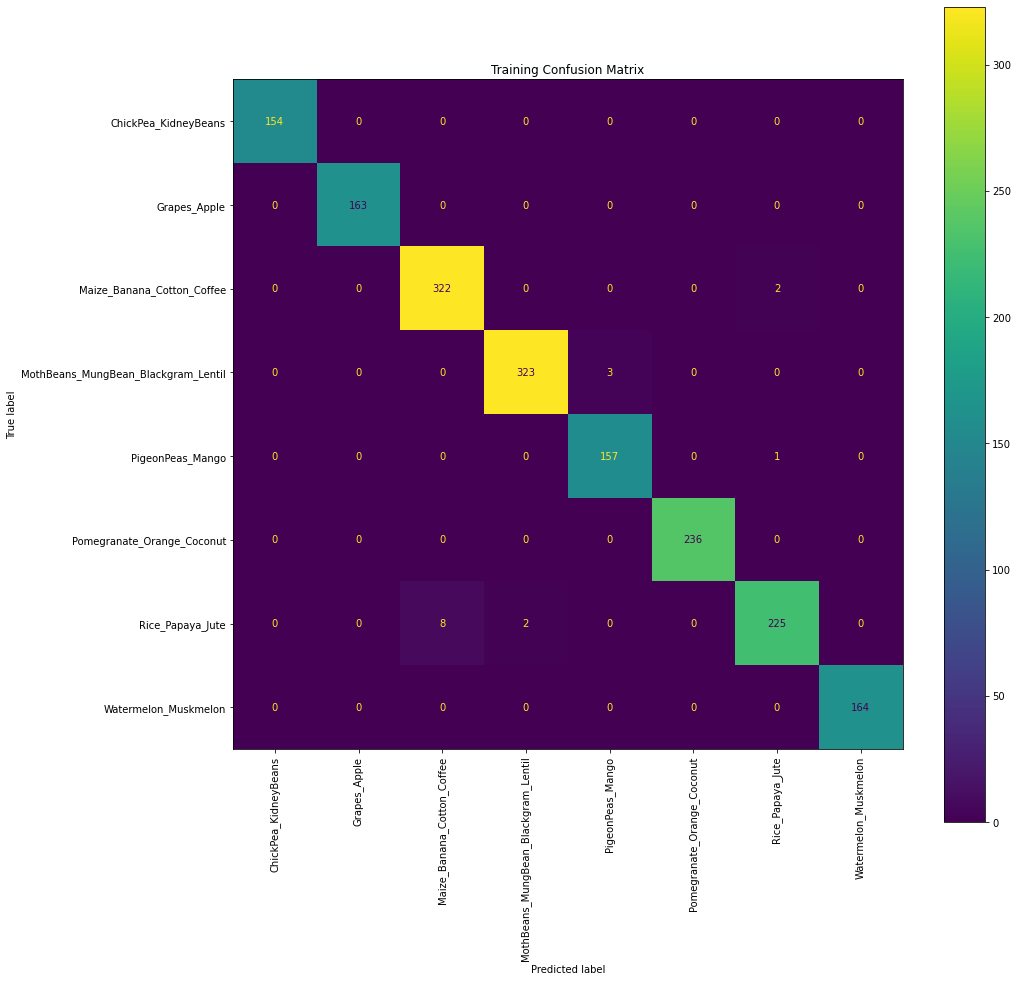

In [40]:
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(estimator=logreg_best_yet,
                     X=X_train_scaled,
                     y_true=y_train,
                     ax = ax,
                     xticks_rotation='vertical'
                     )
plt.title("Training Confusion Matrix")

Text(0.5, 1.0, 'Testing Confusion Matrix')

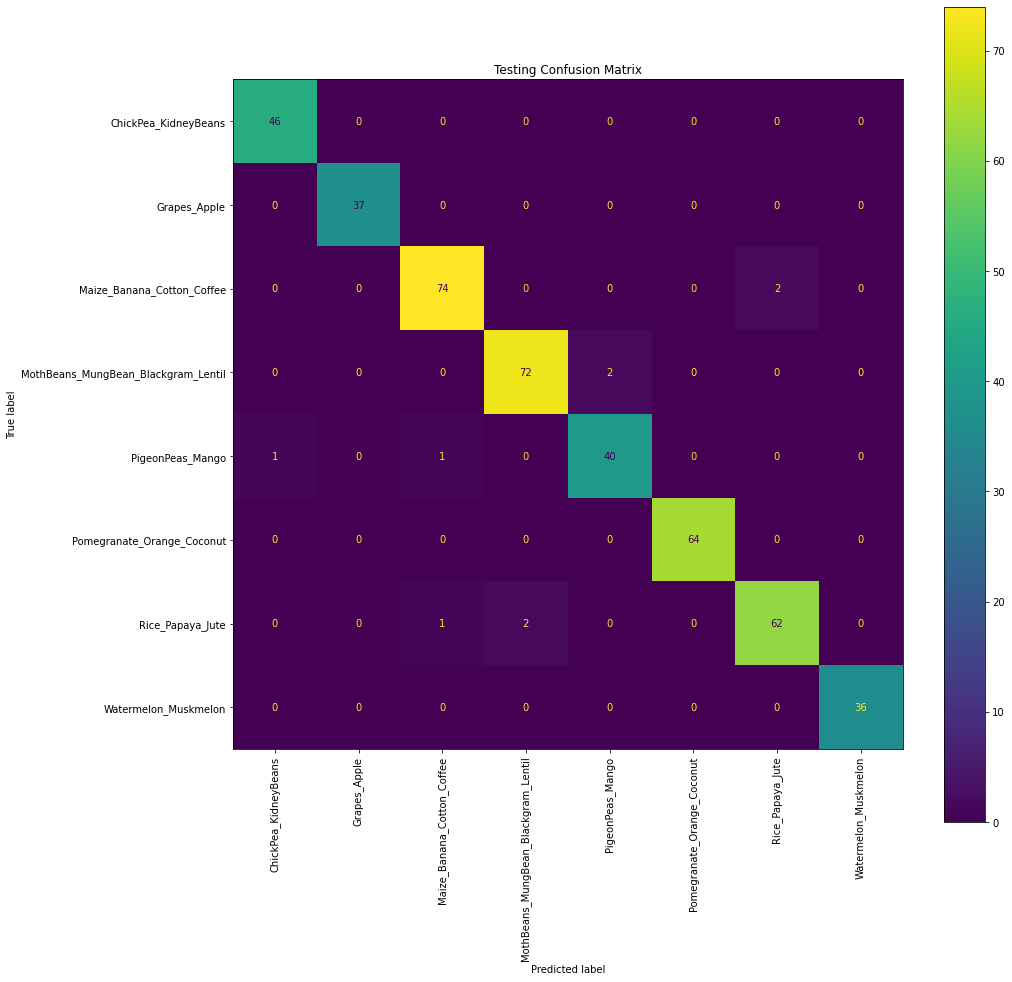

In [41]:
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(estimator=logreg_best_yet,
                     X=X_test_scaled,
                     y_true=y_test,
                     ax = ax,
                     xticks_rotation='vertical'
                     )
plt.title("Testing Confusion Matrix")